**Medical Insurance Cost**

In [6]:
#Importing basic libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#loading data 

data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***1.To Know is there any missing values or not***

In [8]:
#information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there are no missing values in the data

In [9]:
#to know what are the columns present in data


data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

***2.Counting the region and children values***

In [10]:
#region
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
#children
data['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

***3.Cleaning Data***

In [12]:
df={'sex':{'male':0, 'female':1},
    'smoker':{'no':0, 'yes':1},
    'region':{'northwest':0, 'northeast':1,'southeast':2, 'southwest':3}
   }
data_copy=data.copy()
data_copy.replace(df, inplace=True)
data_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Now the data has been converted from category or strings to numerical or integer datatype, which will lead us to easy the progession an analysis

In [13]:
#describing the data

data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


***4.Finding Correlation***

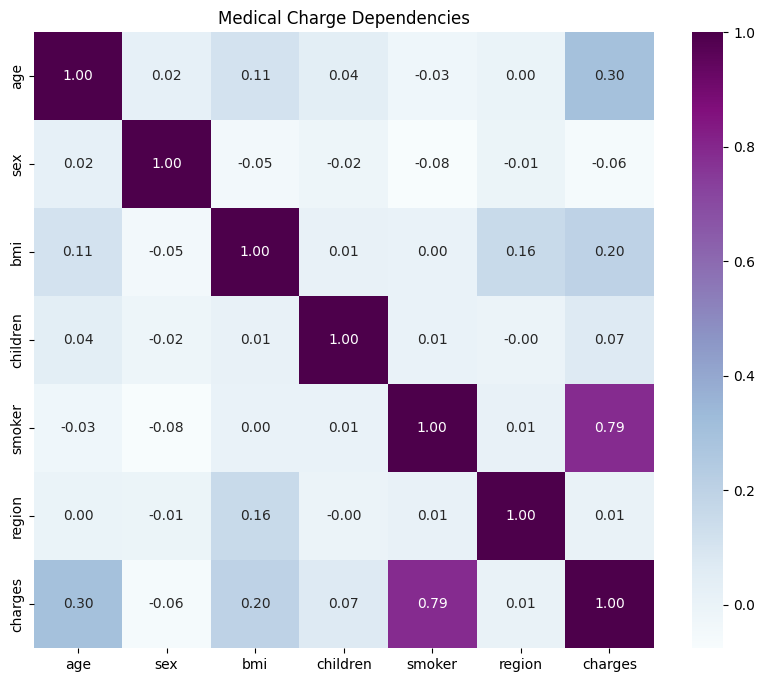

In [14]:
corr=data_copy.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title('Medical Charge Dependencies')
plt.show()

from the above heatmap we come to know that Sex,Children and Region are not effecting/ do not affect the Charges.
Smoker, BMI, and Age are the most important factors that determines the Charges

In [15]:
#Checking the values

print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


***5.Now we confirmed that there ar eno other values in above pre-processed columns,we can perform the EDA***

C:\Users\navin\AppData\Local\Temp\ipykernel_16248\32687162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges',data=data_copy,palette='husl')


<Axes: title={'center': 'Age Vs Charge'}, xlabel='age', ylabel='charges'>

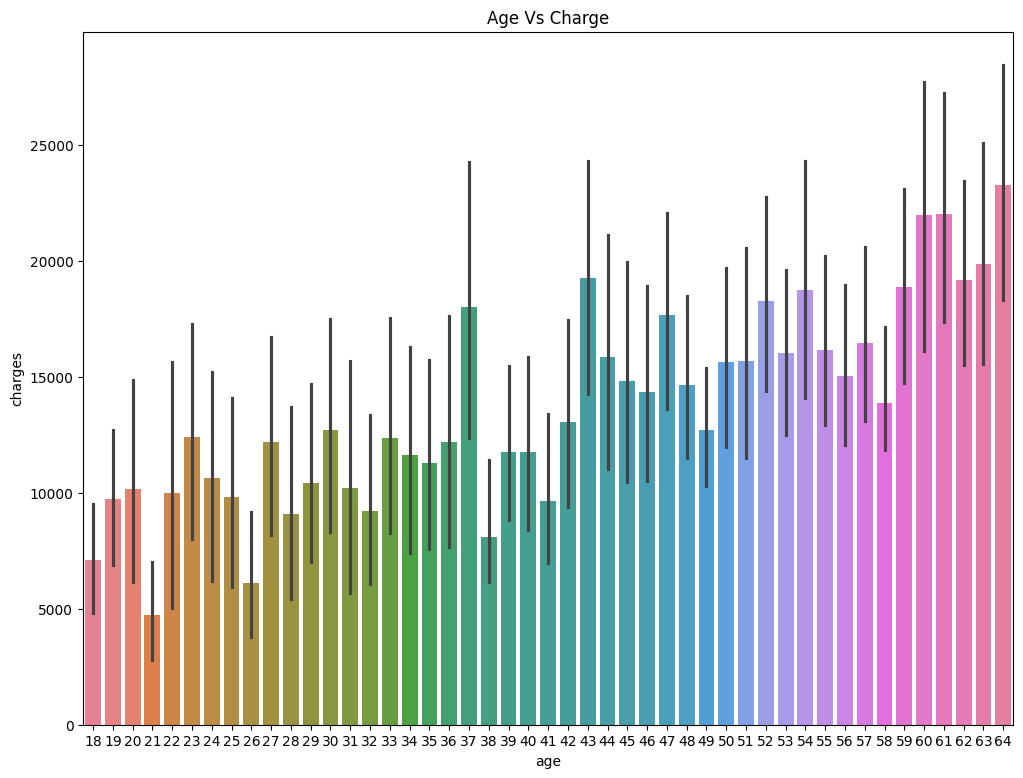

In [16]:
#plottting a bar plot for Age vs Charge

plt.figure(figsize=(12,9))
plt.title('Age Vs Charge')
sns.barplot(x='age', y='charges',data=data_copy,palette='husl')


C:\Users\navin\AppData\Local\Temp\ipykernel_16248\3512872535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges',data=data_copy,palette='Set3')


<Axes: title={'center': 'Region Vs Charge'}, xlabel='region', ylabel='charges'>

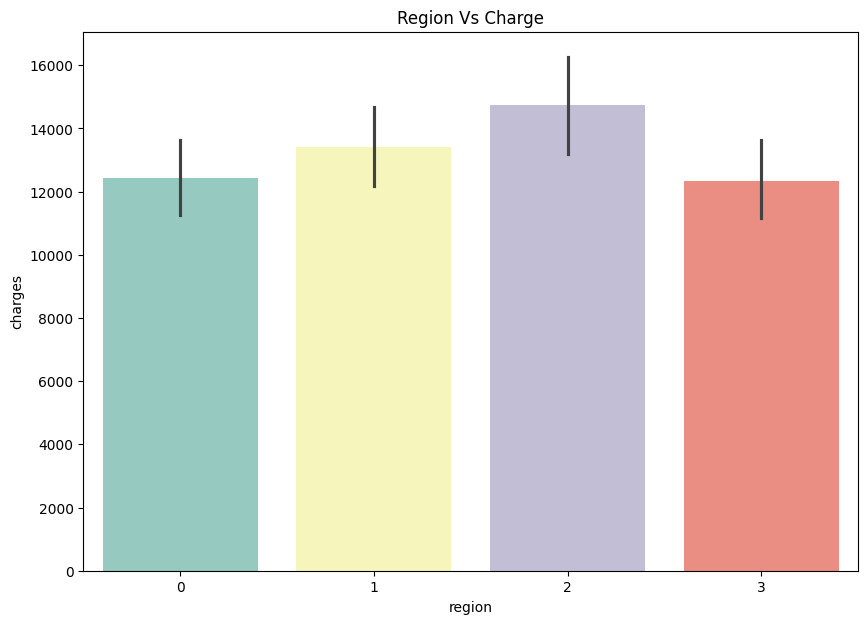

In [17]:
# plotting a bar graph for region vs charges 

plt.figure(figsize=(10,7))
plt.title('Region Vs Charge')
sns.barplot(x='region', y='charges',data=data_copy,palette='Set3')

<Axes: title={'center': 'BMI Vs Charge'}, xlabel='bmi', ylabel='charges'>

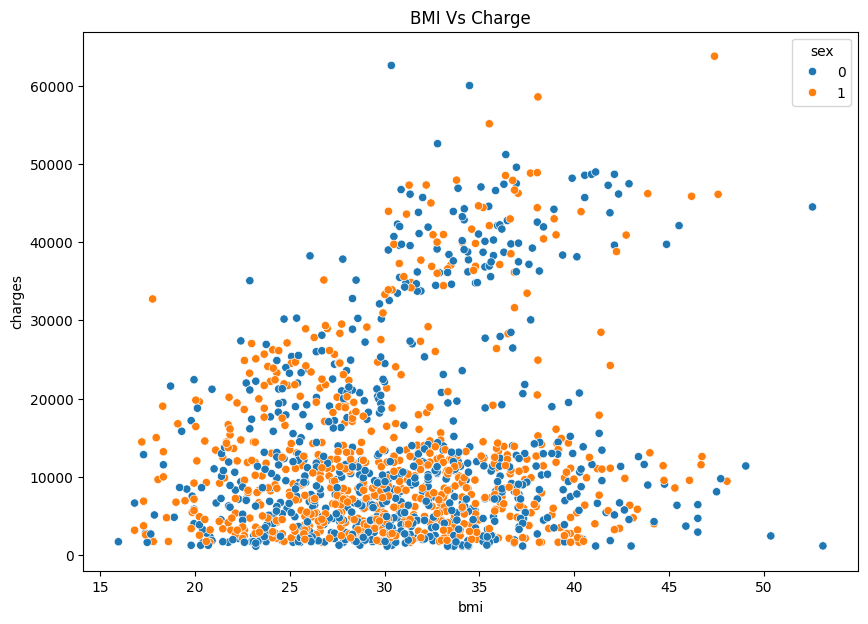

In [18]:
#plotting scater plot for BMI Vs charge

plt.figure(figsize=(10,7))
plt.title('BMI Vs Charge')
sns.scatterplot(x='bmi', y='charges', hue='sex', data=data_copy)

<Axes: title={'center': 'Smoker Vs Charge'}, xlabel='smoker', ylabel='charges'>

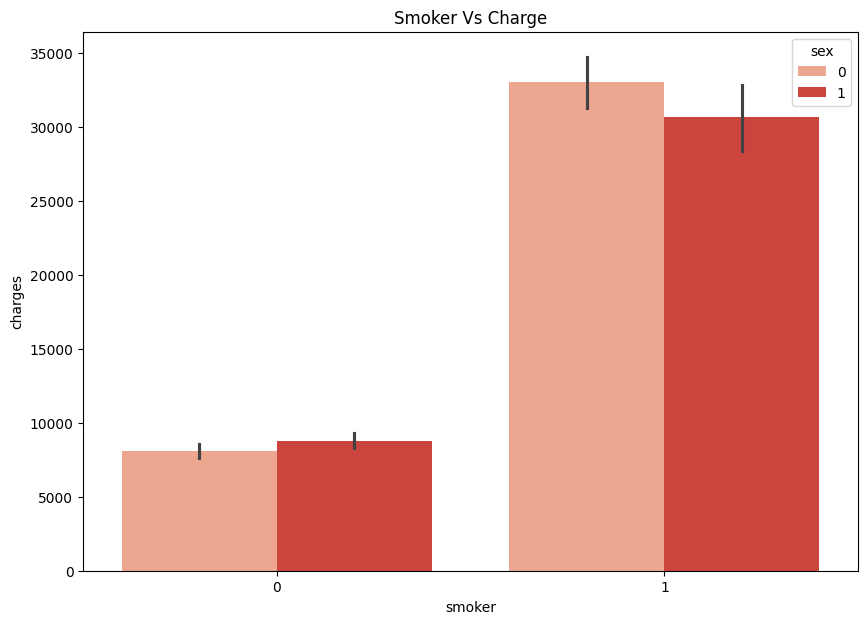

In [19]:
#plotting bar graph for smoker vs charges
plt.figure(figsize=(10,7))
plt.title('Smoker Vs Charge')
sns.barplot(x='smoker', y='charges', data=data_copy, palette='Reds', hue='sex')

C:\Users\navin\AppData\Local\Temp\ipykernel_16248\1958708902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='charges', data=data_copy, palette='Set1')


<Axes: title={'center': 'Sex Vs Charges'}, xlabel='sex', ylabel='charges'>

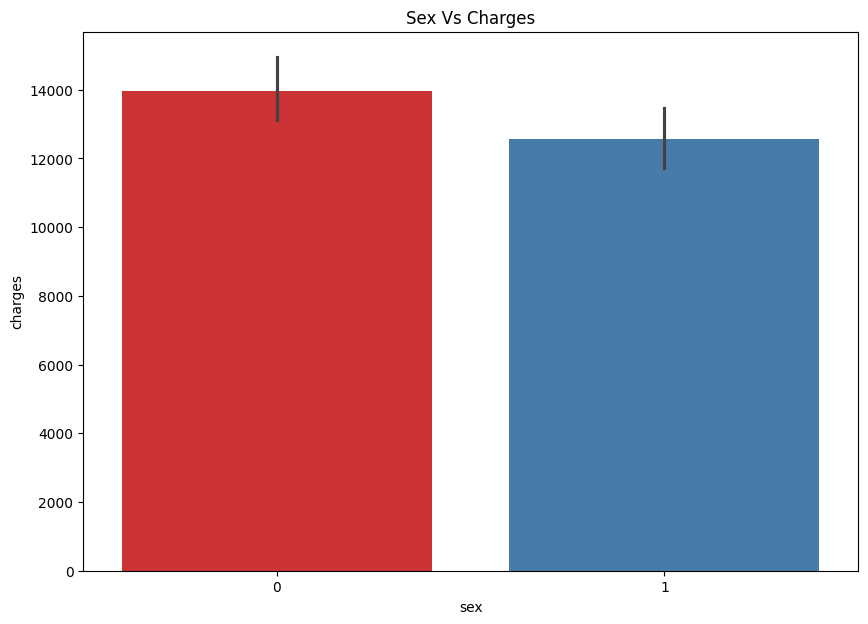

In [20]:
#plotting bar graph for sex vs charges

plt.figure(figsize=(10,7))
plt.title('Sex Vs Charges')
sns.barplot(x='sex', y='charges', data=data_copy, palette='Set1')

***6.Preparing data, we can scale BMI and charges columns before proceding with Prediction***

In [21]:
from sklearn.preprocessing import StandardScaler
data_pre=data_copy.copy()

tempBmi=data_pre.bmi
tempBmi=tempBmi.values.reshape(-1,1)
data_pre['bmi']=StandardScaler().fit_transform(tempBmi)

tempAge=data_pre.age
tempAge=tempAge.values.reshape(-1,1)
data_pre['age']=StandardScaler().fit_transform(tempAge)

tempCharges=data_pre.charges
tempCharges=tempCharges.values.reshape(-1,1)
data_pre['charges']=StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


***7.Traning and tessting data***

In [22]:
X=data_pre.drop('charges', axis=1).values
y=data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

print('size of Xtrain: ',Xtrain.shape)
print('size of ytrain: ',ytrain.shape)
print('size of Xtest: ',Xtest.shape)
print('size of ytest: ',ytest.shape)

size of Xtrain:  (1070, 6)
size of ytrain:  (1070, 1)
size of Xtest:  (268, 6)
size of ytest:  (268, 1)


***Importing libraries***

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


***8.Linear Regression***

In [24]:
%%time
lr=LinearRegression()
lr.fit(Xtrain,ytrain)

CPU times: total: 0 ns
Wall time: 14.8 ms


LinearRegression()

In [26]:
#finding final values 

cv_lr=cross_val_score(estimator=lr, X=X, y=y, cv=10)

ypred_lr_train=lr.predict(Xtrain)
r2_score_lr_train=r2_score(ytrain, ypred_lr_train)

ypred_lr_test=lr.predict(Xtest)
r2_score_lr_test=r2_score(ytest, ypred_lr_test)
rmse_lr=(np.sqrt(mean_squared_error(ytest, ypred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_lr))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480
